In [186]:
import pandas as pd
data = pd.read_csv("weather1.csv")
data


,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [187]:
x = data.iloc[:,0:4].values
x

array([['Rainy', 'Hot', 'High', 'f'],
       ['Rainy', 'Hot', 'High', 't'],
       ['Overcast', 'Hot', 'High', 'f'],
       ['Sunny', 'Mild', 'High', 'f'],
       ['Sunny', 'Cool', 'Normal', 'f'],
       ['Sunny', 'Cool', 'Normal', 't'],
       ['Overcast', 'Cool', 'Normal', 't'],
       ['Rainy', 'Mild', 'High', 'f'],
       ['Rainy', 'Cool', 'Normal', 'f'],
       ['Sunny', 'Mild', 'Normal', 'f'],
       ['Rainy', 'Mild', 'Normal', 't'],
       ['Overcast', 'Mild', 'High', 't'],
       ['Overcast', 'Hot', 'Normal', 'f'],
       ['Sunny', 'Mild', 'High', 't']], dtype=object)

In [188]:
y = data.iloc[:,-1].values
y

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [189]:
data.isnull().sum()

Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

In [190]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
x[:,0] = label.fit_transform(x[:,0])
x[:,1] = label.fit_transform(x[:,1])
x[:,2] = label.fit_transform(x[:,2])
x[:,3] = label.fit_transform(x[:,3])
x


array([[1, 1, 0, 0],
       [1, 1, 0, 1],
       [0, 1, 0, 0],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [2, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [2, 2, 1, 0],
       [1, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [2, 2, 0, 1]], dtype=object)

In [191]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [192]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)


In [193]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [194]:
model.score(x_train,y_train)

0.9090909090909091

In [195]:
y_train_pred=model.predict(x_train)
y_train_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [205]:
y_test_pred=model.predict(x_test)
y_test_pred

array([0, 0, 0])

In [206]:
probability = model.predict_proba(x_test)[::,1]
probability

array([0.05765729, 0.34880135, 0.03898654])

In [207]:
#from sklearn.metrics import accuracy_score
#training_accu = accuracy_score(y_train,y_train_pred)*100
#testing_accu = accuracy_score(y_test,y_test_pred)*100
#training_accu

In [208]:


from sklearn.metrics import accuracy_score

print(f'Accuracy Score on Train Data : {accuracy_score(y_train, y_train_pred)*100}')
print(f'Accuracy Score on Test Data : {accuracy_score(y_test, y_test_pred)*100}')

Accuracy Score on Train Data : 90.9090909090909
Accuracy Score on Test Data : 0.0


<Axes: >

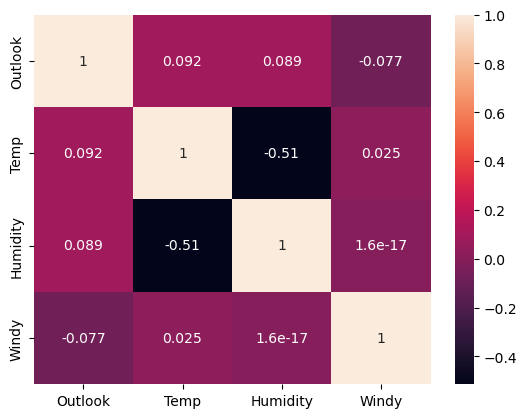

In [211]:
import seaborn as sns
x =data.iloc[:,0:4]
sns.heatmap(x.corr(),annot=True)

In [213]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classif

In [216]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_pred,y_test)
matrix

array([[0, 3],
       [0, 0]], dtype=int64)

<Axes: >

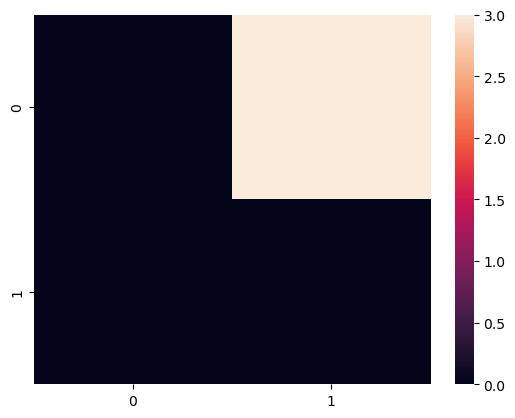

In [219]:
sns.heatmap(matrix)


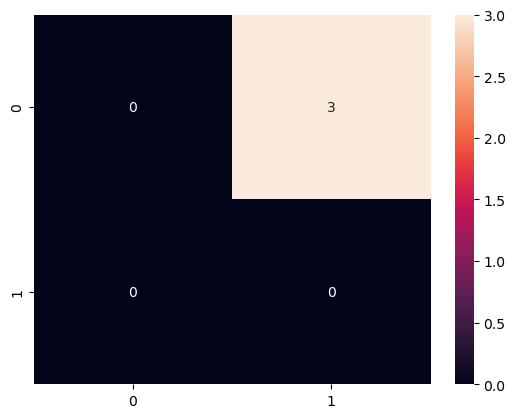

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix,annot=True)
plt.show()

In [223]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import numpy as np
input_data = (1,1,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('no')
else:
  print('yes')

[0]
no
